In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

transfers = pd.read_csv("transfery.csv")
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vek_mother          1012 non-null   object 
 1   vek_embryo          827 non-null    object 
 2   genetic_method      850 non-null    object 
 3   f_donor             186 non-null    float64
 4   examined_genes      86 non-null     object 
 5   sex                 835 non-null    object 
 6   clinical_gravidity  1000 non-null   float64
dtypes: float64(2), object(5)
memory usage: 55.5+ KB


In [2]:
#kontrola hodnot ve sloupcích vek_mother
transfers[transfers["vek_mother"].isnull()].count()
transfers["vek_mother"].value_counts()

vek_mother
32    83
34    82
31    73
33    72
38    68
35    66
39    64
36    62
37    61
30    52
29    51
40    41
28    36
27    35
43    25
26    22
42    21
46    15
45    14
44    13
25    12
48    10
23     9
49     9
47     8
41     6
24     1
x      1
Name: count, dtype: int64

In [3]:
#kontrola hodnot ve sloupcích clinical_gravidity
transfers[transfers["clinical_gravidity"].isnull()].count()
transfers["clinical_gravidity"].value_counts()

clinical_gravidity
0.0    501
1.0    499
Name: count, dtype: int64

In [4]:
#očištění od NULL hodnot ve sloupci clinical_gravidity
transfers[transfers["clinical_gravidity"].isnull()].count()
transfers.dropna(subset=["clinical_gravidity"],inplace=True)


In [5]:
#očištění od hodnoty x ve sloupci vek_mother
transfers.drop(transfers[transfers["vek_mother"] == "x"].index, inplace=True)


In [6]:
#kontrola očištění
transfers["clinical_gravidity"].value_counts()
transfers["vek_mother"].value_counts()


vek_mother
32    81
34    81
31    73
33    72
38    67
35    66
39    63
36    62
37    61
30    52
29    51
40    41
28    36
27    35
43    24
26    22
42    20
46    14
45    13
44    12
25    12
48    10
23     9
47     8
49     7
41     6
24     1
Name: count, dtype: int64

In [7]:
#rozdělení věku matky do 5 kategorií
vek_mother_1 = transfers[transfers["vek_mother"] <= "29"]
vek_mother_2 = transfers[(transfers["vek_mother"] >= "30") & (transfers["vek_mother"] <= "34")]
vek_mother_3 = transfers[(transfers["vek_mother"] >= "35") & (transfers["vek_mother"] <= "39")]
vek_mother_4 = transfers[transfers["vek_mother"] >= "40"]
vek_mother_all = transfers["vek_mother"]


In [8]:
#spočítání úspěšnosti transferu
success_all = ((transfers["clinical_gravidity"] == 1.0).sum() /(transfers["clinical_gravidity"].count()) * 100).round(2)
success_1 = ((vek_mother_1["clinical_gravidity"] == 1.0).sum() /vek_mother_1["clinical_gravidity"].count() * 100).round(2)
success_2 = ((vek_mother_2["clinical_gravidity"] == 1.0).sum() /vek_mother_2["clinical_gravidity"].count() * 100).round(2)
success_3 = ((vek_mother_3["clinical_gravidity"] == 1.0).sum() /vek_mother_3["clinical_gravidity"].count() * 100).round(2)
success_4 = ((vek_mother_4["clinical_gravidity"] == 1.0).sum() /vek_mother_4["clinical_gravidity"].count() * 100).round(2)

In [9]:
#zobrazení tabulky
data = {
    'Všechny věkové kategorie': [success_all],
    'do 29': [success_1],
    '30-34': [success_2],
    '35-39': [success_3],
    '40 a výše': [success_4]
}

novy_dataframe = pd.DataFrame(data)
novy_dataframe

,Všechny věkové kategorie,do 29,30-34,35-39,40 a výše
0,49.95,54.82,51.81,47.96,44.52


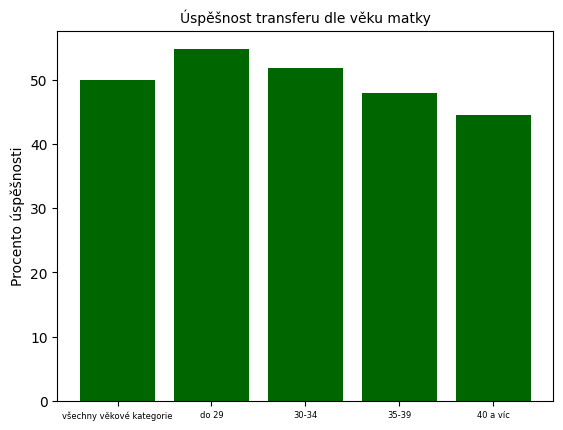

In [10]:
# Zobrazení grafu
data_graf= {
    'Věková kategorie': ['všechny věkové kategorie','do 29', '30-34', '35-39', '40 a víc'],
    'Pocet': [success_all, success_1, success_2, success_3, success_4]
}

# Vytvoření DataFrame
df = pd.DataFrame(data_graf)

# Vytvoření sloupcového grafu
plt.bar(df['Věková kategorie'], df['Pocet'], color='#006600')

# Přidání popisků os a názvu grafu

plt.ylabel('Procento úspěšnosti', fontsize = 10)
plt.title('Úspěšnost transferu dle věku matky', fontsize = 10)
plt.xticks(fontsize=6) 

plt.show()

In [23]:
# Spearmanův korelační koeficient & Kendallovo Tau

spearman = stats.spearmanr(transfers["vek_mother"], transfers["clinical_gravidity"])
kendall = stats.kendalltau(transfers["vek_mother"], transfers["clinical_gravidity"])

print(f"Spearman: {spearman.correlation: .2f}, p-value: {spearman.pvalue}")
print(f"Kendall's Tau: {kendall.correlation: .2f}, p-value: {kendall.pvalue}")

Spearman: -0.08, p-value: 0.011025320206943636
Kendall's Tau: -0.07, p-value: 0.011095099364632866


In [ ]:
# Výsledek: hladina významnosti je menší než 0,05.
# Věk matky a úspěšnost transferu jsou na sobě statisticky závislé.